# 1. La librería *pandas*

La librería *pandas* provee una gran colección de objetos y funciones para la manipulación de datos organizados en forma de tablas. Puede consultar una guía rápida sobre esta librería en 
[https://pandas.pydata.org/docs/user_guide/10min.html](https://pandas.pydata.org/docs/user_guide/10min.html)

En este notebook emplearemos, además de la librería pandas, las librerías numpy y pyplot:


In [1]:
import pandas as pd                # manipulación de datos 
import numpy as np                 # librería numérica
import matplotlib.pyplot as plt    # librería de graficación

# 2. El objeto *Series*

El objeto [*Series*](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series), de la librería *pandas* es un arreglo unidimensional en el que los elementos están etiquetados. El arreglo puede contener cualquier tipo de datos, y la etiqueta se denomina **index**. El valor almacenado en el arreglo se puede recuperar usando el **index**.

## 2.1. Definición de una serie

Una forma de crear una serie es especificando su contenido. Si no se especifica el **index**, se asigna un número entero que inicia en 0.

In [2]:
# Ejemplo: serie sin especificar index
s1 = pd.Series([11,12,13,14,15])
s1

0    11
1    12
2    13
3    14
4    15
dtype: int64

El índice se puede especificar como un arreglo de tamaño adecuado

In [3]:
# Ejemplo: la misma serie, pero especificando un index:
s2 = pd.Series([11,12,13,14,15], index=["a", "b", "c", "d", "e"])
print(s2)

# El index es un arreglo
print("\nEl index de s2:")
print(s2.index)


a    11
b    12
c    13
d    14
e    15
dtype: int64

El index de s2:
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


## 2.1 Acceso al contenido de la serie

Hay dos formas de acceder al contenido de la serie:
* mediante el índice
* mediante la ubicación

### 2.2.1 Acceso mediante el índice
Puede especificarse el valor del índice, o un rango de valores, para recuperar el contenido de la serie.


In [4]:
print("\n la Serie s1:")
print(s1)

# Uso del index para recuparar un valor:
print("\nEl contenido de s1 para el índice 1:")
print(s1[1])

# Uso del index para recuparar varios valores:
print("\nEl contenido de s1 para los valores del índice entre 1 y 4\n (incluye al 1 pero no incluye al 4)")
print(s1[1:4])

print(s1[[2,1]])


 la Serie s1:
0    11
1    12
2    13
3    14
4    15
dtype: int64

El contenido de s1 para el índice 1:
12

El contenido de s1 para los valores del índice entre 1 y 4
 (incluye al 1 pero no incluye al 4)
1    12
2    13
3    14
dtype: int64
2    13
1    12
dtype: int64


### 2.2.2. Acceso mediante la ubicación

Es posible acceder al contenido de la serie mediante el arreglo de enteros **iloc**. 


In [5]:
print("\n la Serie s2:")
print(s2)

# Uso del iloc para recuparar un valor según su posición:
print("\nEl contenido de s2 en la posición 1 (la posición inicial es 0):")
print(s1.iloc[1])

# Uso del iloc para recuparar varios valores según su posición:
print("\nEl contenido de s2 para los valores en las posiciones entre 1 y 4\n (incluye al 1 pero no incluye al 4)")
print(s1.iloc[1:4])

print(s1.iloc[[4,0]])



 la Serie s2:
a    11
b    12
c    13
d    14
e    15
dtype: int64

El contenido de s2 en la posición 1 (la posición inicial es 0):
12

El contenido de s2 para los valores en las posiciones entre 1 y 4
 (incluye al 1 pero no incluye al 4)
1    12
2    13
3    14
dtype: int64
4    15
0    11
dtype: int64


# 3. El objeto *Dataframe*

El objeto [*Dataframe*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) de la librería *pandas* es un arreglo de dos dimensiones que también tiene un **index**. 

Los nombres de las columnas se almacenan en el arreglo **columns**. Cada columna contiene datos de un mismo tipo, pero columnas diferentes pueden tener tipos diferentes.

Debido a que los datos que puede alojar son heterogéneos, un *Dataframe* es un objeto muy versátil con el que se pueden implementar tablas multidimensionales (tablas de tablas). Además, la colección de funciones disponibles permite una manipulación potente de los datos con muy pocas líneas de código.

In [6]:
dF1=pd.DataFrame({"A":[11, 12, 13, 14, 15],
                  "B":['a','b','c','d','e']})
dF1

,A,B
0,11,a
1,12,b
2,13,c
3,14,d
4,15,e


In [7]:
print("\nLas columnas:")
print(dF1.columns)

print("\nEl índice:")
print(dF1.index)


Las columnas:
Index(['A', 'B'], dtype='object')

El índice:
RangeIndex(start=0, stop=5, step=1)


## 3.1. Construcción de dataframes desde archivos

Usualmente los datos están disponibles en uno o más archivos locales o en la red. En este laboratorio usaremos un archivo local de prueba "data.csv" (*comma-separated values*). Podemos explorar las primeras líneas del archivo:

In [8]:
filename = "data.csv"
f = open(filename, "r")
l1=f.readline()
l2=f.readline()
l3=f.readline()
print(l1)
print(l2)
print(l3)

DEPARTAMENTO,MUNICIPIO,POBLACIÓN,ALTITUD,CLIMA,PESO

Bogotá Distrito Capital,Bogotá Distrito Capital,8380801,2640,Frío,0.162538615116029

Antioquia,Medellín,2569007,1405,Templado,0.0513722058494791



Para construir un Dataframe con los datos del archivo, empleamos la función **read_csv()**

In [9]:
DF=pd.read_csv(filename)
DF

,DEPARTAMENTO,MUNICIPIO,POBLACIÓN,ALTITUD,CLIMA,PESO
0,Bogotá Distrito Capital,Bogotá Distrito Capital,8380801,2640,Frío,0.162539
1,Antioquia,Medellín,2569007,1405,Templado,0.051372
2,Valle Del Cauca,Cali,2496442,926,Cálido seco,0.049261
3,Atlántico,Barranquilla,1239518,24,Cálido húmedo,0.025772
4,Bolívar,Cartagena de Indias,1057445,1,Cálido húmedo,0.020761
...,...,...,...,...,...,...
1117,Boyacá,Busbanzá,1324,2500,Frío,0.000023
1118,Guainía,Morichal,1495,198,Cálido húmedo,0.000022
1119,Vaupés,Taraira,937,100,Cálido húmedo,0.000021
1120,Vaupés,Papunaua,825,206,Cálido húmedo,0.000018


## 3.2 Funciones informativas

La clase *Dataframe* proporciona varias funciones que proveen información útil para entender su contenido. Por ejemplo:
* **head()**: muestra los primeros registros (líneas).
* **tail()**: muestra los últimos registros (líneas).
* **info()**: muestra la estructura del *Dataframe*, es decir las columnas y el tipo de datos de cada una de ellas.
* **describe()**: muestra algunas medidas de tendencia y dispersión de las columnas de tipo numérico.

Además, la clase *Dataframe* incluye algunos parámetros útiles como:
* **shape**: un arreglo que muestra la forma del *Dataframe*, es decir, el número de filas y columnas
* **size**: el numero de elementos en el *Dataframe*


In [10]:
DF.head(3)

,DEPARTAMENTO,MUNICIPIO,POBLACIÓN,ALTITUD,CLIMA,PESO
0,Bogotá Distrito Capital,Bogotá Distrito Capital,8380801,2640,Frío,0.162539
1,Antioquia,Medellín,2569007,1405,Templado,0.051372
2,Valle Del Cauca,Cali,2496442,926,Cálido seco,0.049261


In [11]:
DF.tail(3)

,DEPARTAMENTO,MUNICIPIO,POBLACIÓN,ALTITUD,CLIMA,PESO
1119,Vaupés,Taraira,937,100,Cálido húmedo,0.000021
1120,Vaupés,Papunaua,825,206,Cálido húmedo,0.000018
1121,Guainía,La Guadalupe,450,96,Cálido húmedo,0.000007


In [12]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DEPARTAMENTO  1122 non-null   object 
 1   MUNICIPIO     1122 non-null   object 
 2   POBLACIÓN     1122 non-null   int64  
 3   ALTITUD       1122 non-null   int64  
 4   CLIMA         1122 non-null   object 
 5   PESO          1122 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 52.7+ KB


In [13]:
DF.describe()

,POBLACIÓN,ALTITUD,PESO
count,1.122000e+03,1122.000000,1122.000000
mean,4.537589e+04,1125.246881,0.000891
std,2.829817e+05,924.210987,0.005510
min,4.500000e+02,1.000000,0.000007
25%,6.480250e+03,175.250000,0.000145
50%,1.379350e+04,1095.000000,0.000281
75%,2.771925e+04,1845.750000,0.000551
max,8.380801e+06,3300.000000,0.162539


In [14]:
print("Forma del Dataframe:")
print(DF.shape)

print("Número de filas:")
print(DF.shape[0])

print("Número de columnas:")
print(DF.shape[1])

print("\nNúmero de elementos en el Dataframe:")
print(DF.size)


Forma del Dataframe:
(1122, 6)
Número de filas:
1122
Número de columnas:
6

Número de elementos en el Dataframe:
6732


### 3.2.3. Histogramas

La clase *Dataframe* también incluye la función **hist()** con ka que se puede dibujar los histogramas de los datos que están en columnas de tipo numérico:

Histograma de todas las columnas numéricas


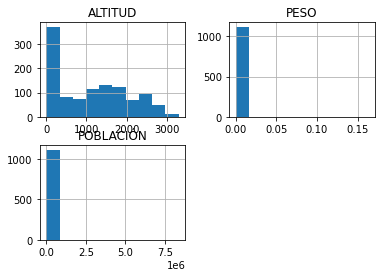

Histograma de una columna


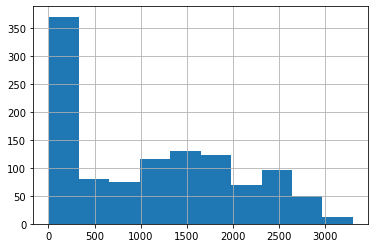

In [15]:
print("Histograma de todas las columnas numéricas")
DF.hist()
plt.show()

print("Histograma de una columna")
DF['ALTITUD'].hist()
plt.show()

### 3.2.2. Los ejes

Las funciones que efectúan cálculos sobre variabes numéricas suelen tener al argumento opcional **axis**. Para tablas simples, ese parámetro permite realizar los cálculos por columnas (**axis=0** ó **axis='index'**) o por filas (**axis=1** ó **axis='columns'**).

Algunas de estas funciones son 
* **mean()** : calcula el valor medio
* **median()** : calcula la mediana
* **min()** : calcula el valor mínimo
* **max()** : calcula el valor máximo
* **sum()** : calcula la suma
* **std()** : calcula la desiación estándar


In [16]:
DF.mean(axis=0)
#DF[["POBLACIÓN","ALTITUD","PESO"]].mean(axis=0)

POBLACIÓN    45375.888592
ALTITUD       1125.246881
PESO             0.000891
dtype: float64

In [17]:
DF[["POBLACIÓN","ALTITUD","PESO"]].mean(axis=1)

0       2.794480e+06
1       8.568040e+05
2       8.324560e+05
3       4.131807e+05
4       3.524820e+05
            ...     
1117    1.274667e+03
1118    5.643333e+02
1119    3.456667e+02
1120    3.436667e+02
1121    1.820000e+02
Length: 1122, dtype: float64

## 3.3 Recuperación de la información en un dataframe

### 3.3.1. Selección de columnas
Se puede obtener un *Dataframe* con un subconjunto de las columnas originales, usando una lista con los nombres de las columnas deseadas.

In [18]:
columnas=["MUNICIPIO","POBLACIÓN"]
DF[columnas]
#DF[["MUNICIPIO","POBLACIÓN"]]

,MUNICIPIO,POBLACIÓN
0,Bogotá Distrito Capital,8380801
1,Medellín,2569007
2,Cali,2496442
3,Barranquilla,1239518
4,Cartagena de Indias,1057445
...,...,...
1117,Busbanzá,1324
1118,Morichal,1495
1119,Taraira,937
1120,Papunaua,825


### 3.3.2. Selección de filas mediante el índice
Si el índice es entero, e puede obtener un *Dataframe* con un subconjunto de las filas originales, especificando los valores iniciales y finales, usando la siguiente sintaxis:

In [19]:
DF[2:6]

,DEPARTAMENTO,MUNICIPIO,POBLACIÓN,ALTITUD,CLIMA,PESO
2,Valle Del Cauca,Cali,2496442,926,Cálido seco,0.049261
3,Atlántico,Barranquilla,1239518,24,Cálido húmedo,0.025772
4,Bolívar,Cartagena de Indias,1057445,1,Cálido húmedo,0.020761
5,Norte De Santander,Cúcuta,680568,297,Cálido seco,0.013545


### 3.3.3. Las propiedades loc, iloc, at, iat :
Para acceder al contenido del *Dataframe* también pueden usarse las siguientes propiedades:
* **loc** : permite acceder a un grupo de filas, mediante el listado de los valores de sus índices.
* **iloc** : permite acceder a un grupo de filas, mediante el listado de sus posiciones (la primera fila tiene la posición 0).
* **at** : permite acceder a un valor individual, especificando el valor del índices y el nombre de la columna.
* **iat** : permite acceder a un valor individual, especificando el número de fila y el número de la columna.

Para ilustrar el uso de estas propiedades, primero construimos un nuevo *Dataframe* al que denminamos *dfx*:

In [20]:
dfx = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=['a', 'b', 'c'], columns=['Col 1', 'Col 2', 'Col 3'])
dfx

,Col 1,Col 2,Col 3
a,0,2,3
b,0,4,1
c,10,20,30


In [21]:
dfx.loc[['a','c']]

,Col 1,Col 2,Col 3
a,0,2,3
c,10,20,30


In [22]:
dfx.iloc[[2,0]]

,Col 1,Col 2,Col 3
c,10,20,30
a,0,2,3


In [23]:
dfx.at['b','Col 2']

4

In [24]:
dfx.iat[1,2]

1

### 3.3.4. Filtrado de filas por contenido
Es posible construir un *Dataframe* a partir de un conjunto de registros que satizfagan una condición de su contenido.

In [25]:
DF[DF["DEPARTAMENTO"]=="Amazonas"]

,DEPARTAMENTO,MUNICIPIO,POBLACIÓN,ALTITUD,CLIMA,PESO
155,Amazonas,Leticia,42956,96,Cálido húmedo,0.000866
796,Amazonas,Puerto Nariño,8771,120,Cálido húmedo,0.000168
960,Amazonas,El Encanto,5065,488,Cálido húmedo,0.000101
970,Amazonas,La Pedrera,5726,119,Cálido húmedo,0.000098
990,Amazonas,Tarapacá,4398,54,Cálido húmedo,0.000087
1016,Amazonas,La Chorrera,4161,370,Cálido húmedo,0.000080
1058,Amazonas,Puerto Santander,3243,226,Cálido húmedo,0.000059
1106,Amazonas,Puerto Alegría,2386,144,Cálido húmedo,0.000037
1109,Amazonas,Miriti - Paraná,1509,81,Cálido húmedo,0.000033
1112,Amazonas,Puerto Arica,1301,96,Cálido húmedo,0.000030


En realidad, el filtrado se realiza con una *Series* booleana, cuyo índice debe coincidir con el del *Dataframe*

In [26]:
condición= DF["DEPARTAMENTO"]=="Amazonas"
print("La condición es una serie booleana:")
print(condición)
DF[condición]

La condición es una serie booleana:
0       False
1       False
2       False
3       False
4       False
        ...  
1117    False
1118    False
1119    False
1120    False
1121    False
Name: DEPARTAMENTO, Length: 1122, dtype: bool


,DEPARTAMENTO,MUNICIPIO,POBLACIÓN,ALTITUD,CLIMA,PESO
155,Amazonas,Leticia,42956,96,Cálido húmedo,0.000866
796,Amazonas,Puerto Nariño,8771,120,Cálido húmedo,0.000168
960,Amazonas,El Encanto,5065,488,Cálido húmedo,0.000101
970,Amazonas,La Pedrera,5726,119,Cálido húmedo,0.000098
990,Amazonas,Tarapacá,4398,54,Cálido húmedo,0.000087
1016,Amazonas,La Chorrera,4161,370,Cálido húmedo,0.000080
1058,Amazonas,Puerto Santander,3243,226,Cálido húmedo,0.000059
1106,Amazonas,Puerto Alegría,2386,144,Cálido húmedo,0.000037
1109,Amazonas,Miriti - Paraná,1509,81,Cálido húmedo,0.000033
1112,Amazonas,Puerto Arica,1301,96,Cálido húmedo,0.000030


# 4. Ejercicio sugerido
Explore el archivo "dataEj.csv", construya un *Dataframe*  y obtenga la siguiente información:
    * El número de filas y columnas del *DataFrame*.
    * El nombre de las columnas.
    * Los histogramas de las columnas numéricas.
    * Algunos valores de tendencia centraly dispersión de las columnas numéricas.


DataFrame:
            FECHA      HORA         I_A         I_B         I_C      KVA_Tot  \
0      2016-10-05  11:00:00  109.287041  110.147362  110.887047  2103.854248   
1      2016-10-05  12:00:00  111.300003  111.064903  113.138161  2197.022217   
2      2016-10-05  13:00:00  105.136642  105.236641  107.071754  2051.411865   
3      2016-10-05  14:00:00   99.702164  100.220459  100.730118  1954.322754   
4      2016-10-05  15:00:00  106.306900  103.913803  105.711502  2033.672485   
...           ...       ...         ...         ...         ...          ...   
22412  2019-12-03  11:00:00   95.090363   94.783279   94.642769  1786.164185   
22413  2019-12-03  12:00:00   96.153091   95.840714   96.175240  1862.299683   
22414  2019-12-03  13:00:00   88.259850   88.522842   88.081131  1734.000000   
22415  2019-12-03  14:00:00   89.411697   87.711693   87.664337  1691.000000   
22416  2019-12-03  16:00:00   86.643059   88.598595   89.340248  1713.971924   

         kVAr_Tot       kW_

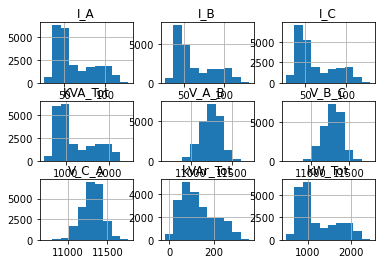

In [11]:
import pandas as pd
dataEj = pd.read_csv("dataEj.csv")

print("\nDataFrame:")
print(dataEj)

print("\nNúmero de filas y columnas:")
print(dataEj.shape)

print("\nNombre de las columnas:")
print(dataEj.columns)

print("\nHistogramas")
print(dataEj.hist())

print("\nAnálisis:")
print(dataEj.describe())